## The Analisys of the NEIGHBOURHOODS of LONDON
#### Applied Data Science Capstone by Coursera (IBM)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

London is much more than just a list of 32 boroughs, or the squiggly colored lines of the tube map. In this project, I try to analyze, understand, and explore neighborhoods. To get the most common venue categories in each area, and then use this feature to group the neighborhoods into clusters.
This project may be useful for people coming to the City of London to help them to uncover the places that London has to offer, to help to understand how similar and diverse neighbourhoods in London are. 


## Data <a name="data"></a>

I use:
 - The Foursquare API to get the relevant data for each neighborhood and to explore each of the areas.
 - Folium library helps to visualize the neighborhoods in London City and their emerging clusters. 
 - The k-means clustering algorithm is used to grouping the data points into distinct subgroups. 

public data from Wikipedia and Foursquare
https://en.wikipedia.org/wiki/List_of_London_boroughs


#### Loading and clearing the data

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import requests
#from bs4 import BeautifulSoup
import os
#!conda install -c conda-forge folium=0.5.0 --yes
import folium 
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [2]:
table = pd.read_html("https://en.wikipedia.org/wiki/List_of_London_boroughs",encoding="utf-8-sig")
df = pd.DataFrame(table[0])
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
1,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
2,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
3,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
4,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12


In [3]:
# check the data shape - should be imported 32 Boroughs and title row
df.shape

(33, 10)

In [4]:
# define the dataframe columns
column_names = ['Borough','Inner','Status','Local authority','Political control','Headquarters','Area (sq mi)','Population (2013 est)[1]','Co-ordinates','Nr. in map']
df.columns = column_names
df = df.drop(df.index[0])
df.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
1,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
2,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
3,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
4,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
5,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


Drop unused columns

In [5]:
df.drop(['Inner', 'Status'], axis = 1, inplace = True) 
df.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
1,Barking and Dagenham [note 1],Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
2,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
3,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
4,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
5,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


#### Work with coordinates
we leave only one representation of the coordinates and than divide them to Latitude and Longitude according to the direction:

In [7]:
import re
def dms2dd(s):
    
    data, direction = re.split('[°\'"]+', s)
    data = data.replace('\ufeff','')
    dd = float(data);
    if direction in ('S','W'):
        dd*= -1
    return dd

df['Co-ordinates'] = df['Co-ordinates'].str.split(' / ', 1).str[1]
df['Latitude'], df['Longitude'] = df['Co-ordinates'].str.split(' ', 1).str

df['Latitude'] = df['Latitude'].apply(dms2dd)
df['Longitude'] = df['Longitude'].apply(dms2dd)

df.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Latitude,Longitude
1,Barking and Dagenham [note 1],Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,﻿51.5607°N 0.1557°E,25,51.5607,0.1557
2,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,﻿51.6252°N 0.1517°W,31,51.6252,-0.1517
3,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,﻿51.4549°N 0.1505°E,23,51.4549,0.1505
4,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,﻿51.5588°N 0.2817°W,12,51.5588,-0.2817
5,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,﻿51.4039°N 0.0198°E,20,51.4039,0.0198


## Methodology <a name="methodology"></a>

First step  - collecte the required data: Boroughs and Venues

Second step - analysis of data: visualisation using graphing from various Python libraries.

Third step - comparison of the neighborhoods, create clusters (using k-means clustering)


## Analysis <a name="analysis"></a>

#### Data visualisation
now we visualize all the boroughs using folium

In [8]:
address = 'London UK'

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [9]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
map_london

1. Data complement

In the next step we use Foursquare API to add additional data to each Borough. We limit the results to 150 venues and radius to 2 km: 

In [11]:
CLIENT_ID = '***' # your Foursquare ID
CLIENT_SECRET = '***' # your Foursquare Secret
VERSION = '20200501' # Foursquare API version

LIMIT = 150 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
london_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Barking and Dagenham [note 1]
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich [note 2]
Hackney
Hammersmith and Fulham [note 4]
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


And now we have the new dataset that contains venues data per borough. Lets check the details:

In [13]:
london_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham [note 1],51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham [note 1],51.5607,0.1557,Lara Grill,51.562445,0.147178,Turkish Restaurant
2,Barking and Dagenham [note 1],51.5607,0.1557,Hoo Hing,51.567561,0.135999,Grocery Store
3,Barking and Dagenham [note 1],51.5607,0.1557,Asda,51.565751,0.143392,Supermarket
4,Barking and Dagenham [note 1],51.5607,0.1557,Iceland,51.560578,0.147685,Grocery Store


In [14]:
london_venues.shape

(2780, 7)

In [15]:
london_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Barking and Dagenham [note 1],32,32,32,32,32,32
Barnet,97,97,97,97,97,97
Bexley,72,72,72,72,72,72
Brent,100,100,100,100,100,100
Bromley,41,41,41,41,41,41
Camden,100,100,100,100,100,100
Croydon,100,100,100,100,100,100
Ealing,100,100,100,100,100,100
Enfield,90,90,90,90,90,90


So we have all the data and we are redy to the next step - to use this data for analysis to produce the report

2 .Data Exploration

In [19]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))
london_venue_unique_count = london_venues['Venue Category'].value_counts().to_frame(name='Count')
print ('Categories by count: ')
london_venue_unique_count

There are 276 uniques categories.
Categories by count: 


,Count
Pub,223
Coffee Shop,193
Café,116
Park,109
Hotel,102
Grocery Store,97
Supermarket,79
Pizza Place,74
Italian Restaurant,70
Indian Restaurant,68


We can see that most popular category are Pub and Coffee Shop. Lets check additional details.

- Number of different categoies per Neighbourhood

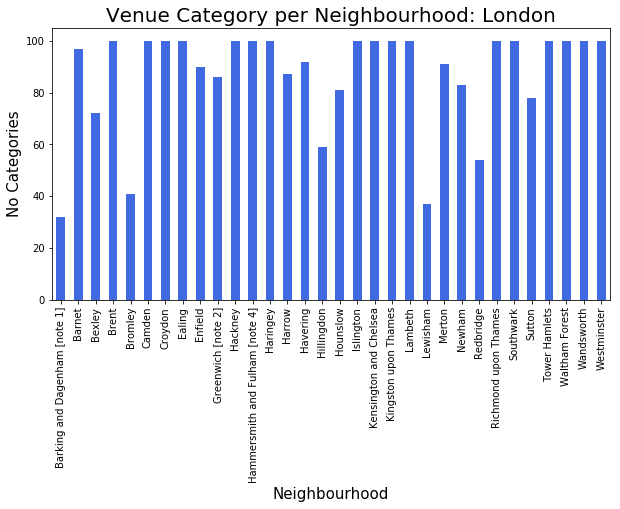

In [20]:
clr = "royalblue"
london_venues.groupby('Neighbourhood')['Venue Category'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Venue Category per Neighbourhood: London', fontsize = 20)
plt.xlabel('Neighbourhood', fontsize = 15)
plt.ylabel('No Categories',fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

 - Number of Pubs (the most common category) per Neighbourhood

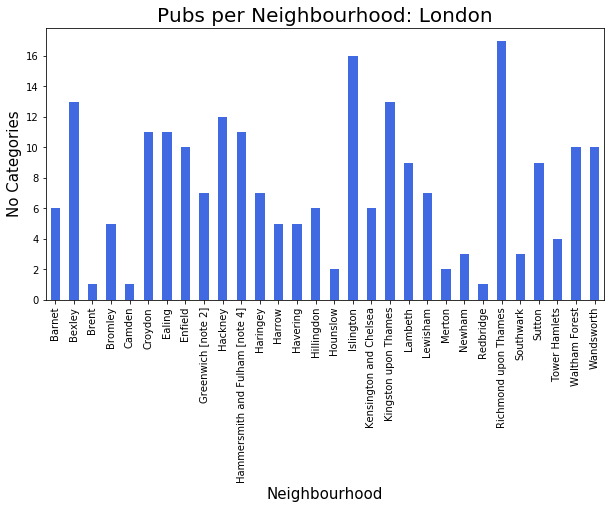

In [21]:
df_pub = london_venues[london_venues['Venue Category'] == 'Pub']
df_pub.groupby('Neighbourhood')['Venue Category'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Pubs per Neighbourhood: London', fontsize = 20)
plt.xlabel('Neighbourhood', fontsize = 15)
plt.ylabel('No Categories',fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

We can see that Richmond upon Thames and Islington have many pubs while Redbridge or Brent have a few...

Lets look on specific Neighbourhood: **Kensington and Chelsea**

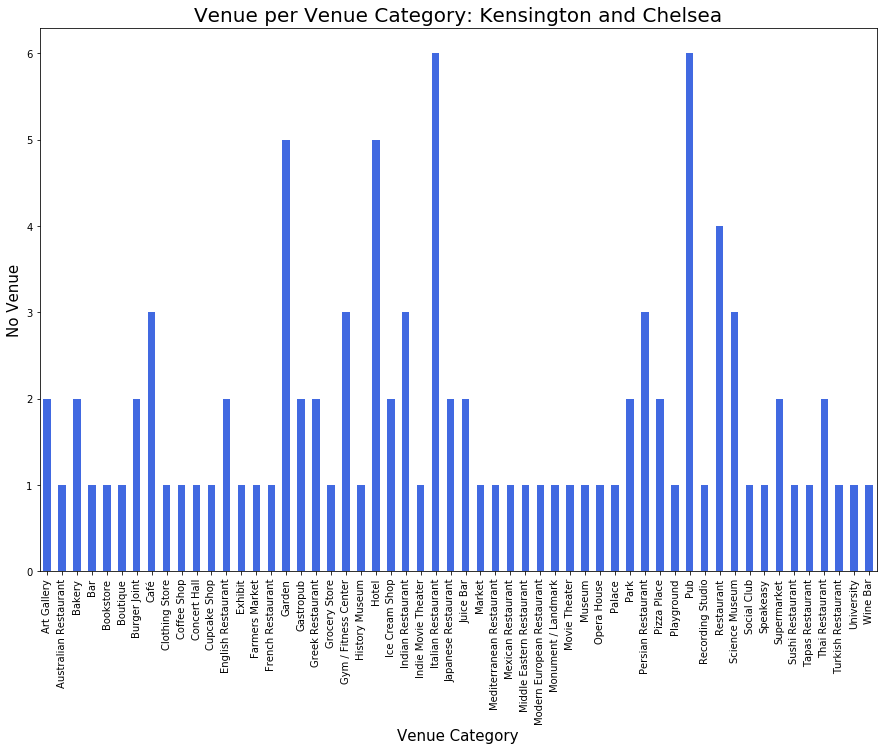

In [22]:
df_KandC = london_venues[london_venues['Neighbourhood'] == 'Kensington and Chelsea']
df_KandC.groupby('Venue Category')['Venue'].count().plot.bar(figsize=(15,10), color=clr)
plt.title('Venue per Venue Category: Kensington and Chelsea', fontsize = 20)
plt.xlabel('Venue Category', fontsize = 15)
plt.ylabel('No Venue',fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

 And additional one with significal less number of vanues: Lewisham

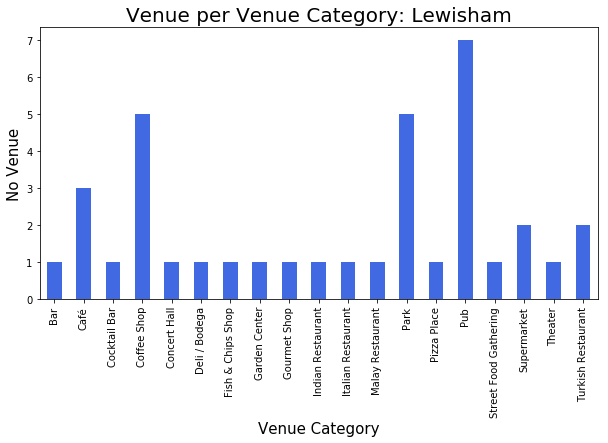

In [24]:
df_Lewisham = london_venues[london_venues['Neighbourhood'] == 'Lewisham']
df_Lewisham.groupby('Venue Category')['Venue'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Venue per Venue Category: Lewisham', fontsize = 20)
plt.xlabel('Venue Category', fontsize = 15)
plt.ylabel('No Venue',fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

3. Clustering

For this section, the neighbourhoods in London will be clustered based on the processed data obtained above.


Using One Hot encoding on the above dataframe, create another dataframe and then group all the neighborhoods based on the frequency of occurrence of each venue category.


In [26]:
ln_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix = "", prefix_sep = "")
# add neighborhood column back to dataframe
ln_onehot['Neighbourhood'] = london_venues['Neighbourhood']

In [27]:
# move neighborhood column to the first column
fixed_columns = [ln_onehot.columns[-1]] + list(ln_onehot.columns[:-1])
ln_onehot = ln_onehot[fixed_columns]
ln_onehot.head()

,Neighbourhood,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Mall,Outlet Store,Paintball Field,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Rugby Stadium,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Temple,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Windmill,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham [note 1],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [29]:
# check for Rock Club (as example)
ln_onehot.loc[ln_onehot['Rock Club'] != 0]

,Neighbourhood,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Mall,Outlet Store,Paintball Field,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Rugby Stadium,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Temple,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Windmill,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
1514,Islington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

 - Groupping and Statistics

In [30]:
ln_grouped = ln_onehot.groupby('Neighbourhood').mean().reset_index()
ln_grouped

,Neighbourhood,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Mall,Outlet Store,Paintball Field,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Rugby Stadium,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Temple,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Windmill,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham [note 1],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,

 - Grouping of each Neighbourhoods with 10 common venues:

In [32]:
num_top_venues = 10 # Top common venues needed
for hood in ln_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = ln_grouped[ln_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Barking and Dagenham [note 1]----
            venue  freq
0   Grocery Store  0.12
1     Supermarket  0.09
2     Gas Station  0.06
3            Park  0.06
4        Platform  0.06
5     Bus Station  0.03
6  History Museum  0.03
7        Bus Stop  0.03
8           Diner  0.03
9    Soccer Field  0.03


----Barnet----
                  venue  freq
0           Coffee Shop  0.09
1                   Pub  0.06
2                  Café  0.06
3         Grocery Store  0.05
4                  Park  0.05
5    Italian Restaurant  0.04
6              Pharmacy  0.04
7                 Hotel  0.03
8           Pizza Place  0.03
9  Fast Food Restaurant  0.03


----Bexley----
                  venue  freq
0                   Pub  0.18
1           Supermarket  0.07
2  Fast Food Restaurant  0.06
3        Clothing Store  0.06
4           Coffee Shop  0.04
5         Grocery Store  0.04
6   American Restaurant  0.04
7    Italian Restaurant  0.04
8                 Hotel  0.04
9              Pharmacy  0.03


--

9                Lounge  0.03


----Waltham Forest----
                  venue  freq
0                   Pub  0.10
1           Supermarket  0.07
2           Coffee Shop  0.06
3         Grocery Store  0.06
4    Turkish Restaurant  0.04
5                  Café  0.04
6           Pizza Place  0.04
7  Gym / Fitness Center  0.03
8        Sandwich Place  0.03
9        Clothing Store  0.02


----Wandsworth----
               venue  freq
0                Pub  0.10
1        Coffee Shop  0.09
2               Park  0.08
3               Café  0.06
4        Pizza Place  0.06
5                Bar  0.05
6    Thai Restaurant  0.04
7  Indian Restaurant  0.03
8       Cocktail Bar  0.03
9                Gym  0.03


----Westminster----
          venue  freq
0         Hotel  0.16
1         Plaza  0.05
2          Park  0.05
3  Cocktail Bar  0.05
4        Garden  0.04
5    Art Museum  0.03
6   Coffee Shop  0.03
7          Café  0.03
8        Lounge  0.03
9   Art Gallery  0.02




Now lets create the new dataframe with most common venuesis

In [50]:
def most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = ln_grouped['Neighbourhood']
for ind in np.arange(ln_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = most_common_venues(ln_grouped.iloc[ind, :], num_top_venues)
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham [note 1],Grocery Store,Supermarket,Platform,Gas Station,Park,Pool,Racetrack,Bus Stop,Bus Station,Café
1,Barnet,Coffee Shop,Café,Pub,Grocery Store,Park,Pharmacy,Italian Restaurant,Pizza Place,Supermarket,Fast Food Restaurant
2,Bexley,Pub,Supermarket,Clothing Store,Fast Food Restaurant,Coffee Shop,American Restaurant,Hotel,Grocery Store,Italian Restaurant,Pharmacy
3,Brent,Coffee Shop,Indian Restaurant,Hotel,Clothing Store,Grocery Store,Sandwich Place,Pizza Place,Sporting Goods Shop,Bar,Ice Cream Shop
4,Bromley,Pub,Pizza Place,Gym / Fitness Center,Coffee Shop,Clothing Store,Indian Restaurant,Park,Portuguese Restaurant,Donut Shop,Bar


In [51]:
ln_grouped_clustering = ln_grouped.drop('Neighbourhood', 1)
# set number of clusters
kclusters = 5
# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(ln_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 1, 1, 2, 3, 0, 1, 3, 1, 1])

In [52]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [53]:
merged = df
# match/merge SE London data with latitude/longitude for each neighborhood
merged_latlong = merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on = 'Borough')
merged_latlong.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barking and Dagenham [note 1],Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,﻿51.5607°N 0.1557°E,25,51.5607,0.1557,4,Grocery Store,Supermarket,Platform,Gas Station,Park,Pool,Racetrack,Bus Stop,Bus Station,Café
2,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,﻿51.6252°N 0.1517°W,31,51.6252,-0.1517,1,Coffee Shop,Café,Pub,Grocery Store,Park,Pharmacy,Italian Restaurant,Pizza Place,Supermarket,Fast Food Restaurant
3,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,﻿51.4549°N 0.1505°E,23,51.4549,0.1505,1,Pub,Supermarket,Clothing Store,Fast Food Restaurant,Coffee Shop,American Restaurant,Hotel,Grocery Store,Italian Restaurant,Pharmacy
4,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,﻿51.5588°N 0.2817°W,12,51.5588,-0.2817,2,Coffee Shop,Indian Restaurant,Hotel,Clothing Store,Grocery Store,Sandwich Place,Pizza Place,Sporting Goods Shop,Bar,Ice Cream Shop
5,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,﻿51.4039°N 0.0198°E,20,51.4039,0.0198,3,Pub,Pizza Place,Gym / Fitness Center,Coffee Shop,Clothing Store,Indian Restaurant,Park,Portuguese Restaurant,Donut Shop,Bar


Visualizing the Resulting Clusters

In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged_latlong['Latitude'], merged_latlong['Longitude'], merged_latlong['Borough'], merged_latlong['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
display(map_clusters)

In [55]:
# Cluster 1
merged_latlong.loc[merged_latlong['Cluster Labels'] == 0, merged_latlong.columns[[1] + list(range(5, merged_latlong.shape[1]))]]

,Local authority,Population (2013 est)[1],Co-ordinates,Nr. in map,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Camden London Borough Council,229719,﻿51.5290°N 0.1255°W,11,51.5290,-0.1255,0,Pizza Place,Coffee Shop,Hotel,Cocktail Bar,Bookstore,Sushi Restaurant,Café,Beer Bar,Gym / Fitness Center,Exhibit
19,Kensington and Chelsea London Borough Council,155594,﻿51.5020°N 0.1947°W,3,51.5020,-0.1947,0,Pub,Italian Restaurant,Garden,Hotel,Restaurant,Science Museum,Persian Restaurant,Indian Restaurant,Café,Gym / Fitness Center
24,Newham London Borough Council,318227,﻿51.5077°N 0.0469°E,27,51.5077,0.0469,0,Hotel,Coffee Shop,Café,Gym / Fitness Center,Grocery Store,Sandwich Place,Pub,Hotel Bar,Restaurant,Chinese Restaurant
27,Southwark London Borough Council,298464,﻿51.5035°N 0.0804°W,7,51.5035,-0.0804,0,Coffee Shop,Hotel,Italian Restaurant,Cocktail Bar,Scenic Lookout,Gym / Fitness Center,Park,Art Museum,Brewery,Seafood Restaurant
29,Tower Hamlets London Borough Council,272890,﻿51.5099°N 0.0059°W,8,51.5099,-0.0059,0,Coffee Shop,Hotel,Burger Joint,Pub,Bar,Gym / Fitness Center,Italian Restaurant,Plaza,Lounge,Park
32,Westminster City Council,226841,﻿51.4973°N 0.1372°W,2,51.4973,-0.1372,0,Hotel,Cocktail Bar,Plaza,Park,Garden,Café,Coffee Shop,Art Museum,Lounge,Theater


In [56]:
# Cluster 2
merged_latlong.loc[merged_latlong['Cluster Labels'] == 1, merged_latlong.columns[[1] + list(range(5, merged_latlong.shape[1]))]]

,Local authority,Population (2013 est)[1],Co-ordinates,Nr. in map,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Barnet London Borough Council,369088,﻿51.6252°N 0.1517°W,31,51.6252,-0.1517,1,Coffee Shop,Café,Pub,Grocery Store,Park,Pharmacy,Italian Restaurant,Pizza Place,Supermarket,Fast Food Restaurant
3,Bexley London Borough Council,236687,﻿51.4549°N 0.1505°E,23,51.4549,0.1505,1,Pub,Supermarket,Clothing Store,Fast Food Restaurant,Coffee Shop,American Restaurant,Hotel,Grocery Store,Italian Restaurant,Pharmacy
7,Croydon London Borough Council,372752,﻿51.3714°N 0.0977°W,19,51.3714,-0.0977,1,Pub,Coffee Shop,Clothing Store,Supermarket,Park,Mediterranean Restaurant,Grocery Store,Café,Hotel,Indian Restaurant
9,Enfield London Borough Council,320524,﻿51.6538°N 0.0799°W,30,51.6538,-0.0799,1,Pub,Supermarket,Coffee Shop,Pizza Place,Grocery Store,Clothing Store,Pharmacy,Indian Restaurant,Fast Food Restaurant,Train Station
10,Greenwich London Borough Council,264008,﻿51.4892°N 0.0648°E,22,51.4892,0.0648,1,Grocery Store,Pub,Park,Coffee Shop,Plaza,Supermarket,Café,Sandwich Place,Bakery,Clothing Store
13,Haringey London Borough Council,263386,﻿51.6000°N 0.1119°W,29,51.6000,-0.1119,1,Café,Grocery Store,Pub,Park,Mediterranean Restaurant,Turkish Restaurant,Bakery,Coffee Shop,Gym / Fitness Center,Indian Restaurant
15,Havering London Borough Council,242080,﻿51.5812°N 0.1837°E,24,51.5812,0.1837,1,Coffee Shop,Grocery Store,Fast Food Restaurant,Pub,Supermarket,Clothing Store,Shopping Mall,Furniture / Home Store,Café,English Restaurant
16,Hillingdon London Borough Council,286806,﻿51.5441°N 0.4760°W,33,51.5441,-0.4760,1,Coffee Shop,Pub,Italian Restaurant,Fast Food Restaurant,Sandwich Place,Supermarket,Clothing Store,Restaurant,Burger Joint,Gym / Fitness Center
23,Merton London Borough Council,203223,﻿51.4014°N 0.1958°W,17,51.4014,-0.1958,1,Coffee Shop,Park,Supermarket,Café,Grocery Store,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Pizza Place,Hotel
28,Sutton London Borough Council,195914,﻿51.3618°N 0.1945°W,18,51.3618,-0.1945,1,Pub,Coffee Shop,Grocery Store,Clothing Store,Italian Restaurant,Pizza Place,Café,Supermarket,Park,Department Store


In [57]:
# Cluster 3
merged_latlong.loc[merged_latlong['Cluster Labels'] == 2, merged_latlong.columns[[1] + list(range(5, merged_latlong.shape[1]))]]

,Local authority,Population (2013 est)[1],Co-ordinates,Nr. in map,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Brent London Borough Council,317264,﻿51.5588°N 0.2817°W,12,51.5588,-0.2817,2,Coffee Shop,Indian Restaurant,Hotel,Clothing Store,Grocery Store,Sandwich Place,Pizza Place,Sporting Goods Shop,Bar,Ice Cream Shop
14,Harrow London Borough Council,243372,﻿51.5898°N 0.3346°W,32,51.5898,-0.3346,2,Coffee Shop,Indian Restaurant,Pub,Grocery Store,Fast Food Restaurant,Park,Café,Sandwich Place,Gym / Fitness Center,Pizza Place
17,Hounslow London Borough Council,262407,﻿51.4746°N 0.3680°W,14,51.4746,-0.3680,2,Indian Restaurant,Coffee Shop,Bus Stop,Clothing Store,Metro Station,Grocery Store,Sandwich Place,Fast Food Restaurant,Park,Hotel
25,Redbridge London Borough Council,288272,﻿51.5590°N 0.0741°E,26,51.5590,0.0741,2,Grocery Store,Supermarket,Coffee Shop,Hotel,Clothing Store,Fast Food Restaurant,Department Store,Sandwich Place,Pizza Place,Park


In [58]:
# Cluster 4
merged_latlong.loc[merged_latlong['Cluster Labels'] == 3, merged_latlong.columns[[1] + list(range(5, merged_latlong.shape[1]))]]

,Local authority,Population (2013 est)[1],Co-ordinates,Nr. in map,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Bromley London Borough Council,317899,﻿51.4039°N 0.0198°E,20,51.4039,0.0198,3,Pub,Pizza Place,Gym / Fitness Center,Coffee Shop,Clothing Store,Indian Restaurant,Park,Portuguese Restaurant,Donut Shop,Bar
8,Ealing London Borough Council,342494,﻿51.5130°N 0.3089°W,13,51.5130,-0.3089,3,Pub,Coffee Shop,Park,Hotel,Italian Restaurant,Pizza Place,Café,Burger Joint,Vietnamese Restaurant,Greek Restaurant
11,Hackney London Borough Council,257379,﻿51.5450°N 0.0553°W,9,51.5450,-0.0553,3,Pub,Coffee Shop,Café,Bakery,Cocktail Bar,Park,Wine Shop,Brewery,Supermarket,Garden
12,Hammersmith and Fulham London Borough Council,178685,﻿51.4927°N 0.2339°W,4,51.4927,-0.2339,3,Pub,Café,Coffee Shop,Indian Restaurant,Park,Gastropub,Japanese Restaurant,Pizza Place,French Restaurant,Thai Restaurant
18,Islington London Borough Council,215667,﻿51.5416°N 0.1022°W,10,51.5416,-0.1022,3,Pub,Café,Park,Gastropub,Theater,Canal,Trail,Coffee Shop,Gym / Fitness Center,Mediterranean Restaurant
20,Kingston upon Thames London Borough Council,166793,﻿51.4085°N 0.3064°W,16,51.4085,-0.3064,3,Pub,Café,Coffee Shop,Thai Restaurant,Burger Joint,Gastropub,Italian Restaurant,Department Store,Park,Japanese Restaurant
21,Lambeth London Borough Council,314242,﻿51.4607°N 0.1163°W,6,51.4607,-0.1163,3,Coffee Shop,Pub,Cocktail Bar,Market,Café,Park,Pizza Place,Restaurant,Brewery,Caribbean Restaurant
22,Lewisham London Borough Council,286180,﻿51.4452°N 0.0209°W,21,51.4452,-0.0209,3,Pub,Coffee Shop,Park,Café,Turkish Restaurant,Supermarket,Concert Hall,Gourmet Shop,Deli / Bodega,Cocktail Bar
26,Richmond upon Thames London Borough Council,191365,﻿51.4479°N 0.3260°W,15,51.4479,-0.3260,3,Pub,Café,Italian Restaurant,Park,Rugby Stadium,Garden,Thai Restaurant,Hotel,Indian Restaurant,Coffee Shop
31,Wandsworth London Borough Council,310516,﻿51.4567°N 0.1910°W,5,51.4567,-0.1910,3,Pub,Coffee Shop,Park,Café,Pizza Place,Bar,Thai Restaurant,Gym,Indian Restaurant,Cocktail Bar


In [59]:
# Cluster 5
merged_latlong.loc[merged_latlong['Cluster Labels'] == 4, merged_latlong.columns[[1] + list(range(5, merged_latlong.shape[1]))]]

,Local authority,Population (2013 est)[1],Co-ordinates,Nr. in map,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barking and Dagenham London Borough Council,194352,﻿51.5607°N 0.1557°E,25,51.5607,0.1557,4,Grocery Store,Supermarket,Platform,Gas Station,Park,Pool,Racetrack,Bus Stop,Bus Station,Café


## Results and Discussion <a name="results"></a>

Results
The following are the highlights of the 5 clusters above:
1. Pubs, Cafe, Coffee Shops are popular in the South East London.
2. As for restaurants, for example, the Indian Restaurants are very popular in Brent and Harrow areas.
3. Although, the Clusters have variations, a very visible presence is the predominance of pubs. (That we also could see on data analysis section)